# <center> **Sports Celebrity Image Classification** </center>

In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## **(1) Preprocessing: Detect face and eyes**
#### __When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.__


In [5]:
img = cv2.imread('./model/test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

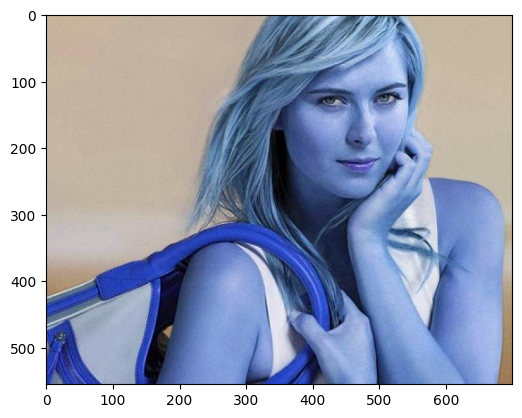

In [7]:
plt.imshow(img)
plt.show()

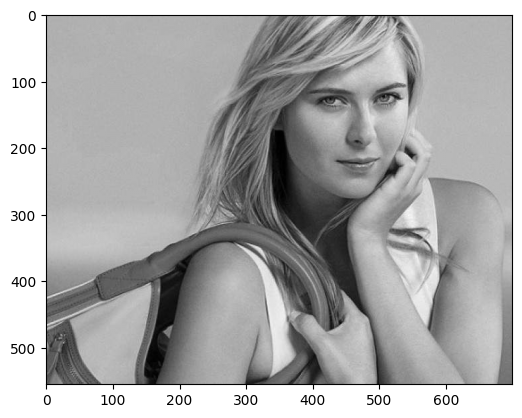

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray, cmap='gray')
# plt.axis('off')  # Optional: Remove axis
plt.show()

In [11]:
import cv2
import os

# Load the image
img = cv2.imread('./model/test_images/sharapova1.jpg')

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found or could not be opened.")
else:
    # Proceed with color conversion
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("Image shape:", gray.shape)


Image shape: (555, 700)


In [13]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], shape=(555, 700), dtype=uint8)

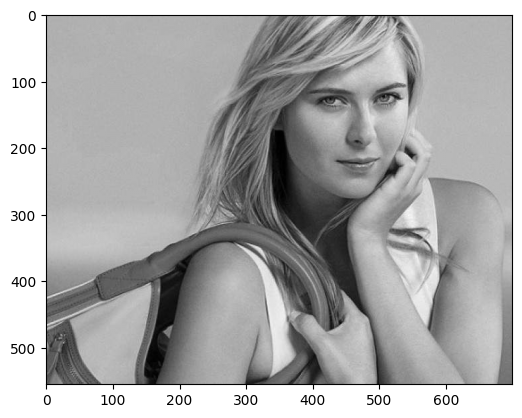

In [15]:
plt.imshow(gray, cmap="gray")

In [17]:
face_cascade = cv2.CascadeClassifier('./model/opencv:haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./model/opencv:haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

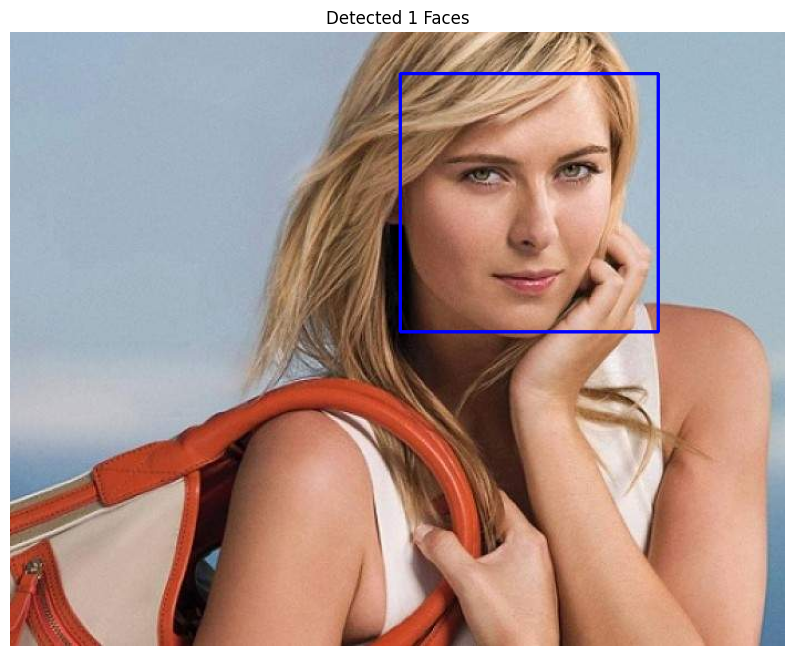

Number of faces detected: 1


In [19]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display image with face rectangles
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f'Detected {len(faces)} Faces')
plt.show()

# Print number of faces detected
print(f"Number of faces detected: {len(faces)}")

In [21]:
import os

print(os.path.exists('./model/opencv:haarcascades/haarcascade_frontalface_default.xml'))  # Should return True
print(os.path.exists('./model/opencv:haarcascades/haarcascade_eye.xml'))  # Should return True


True
True


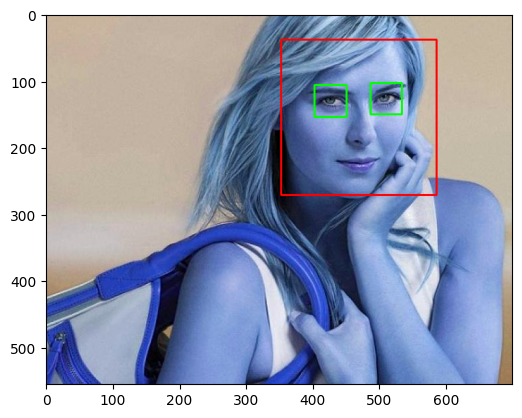

In [23]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


## **(2) Preprocessing: Crop the facial region of the image**

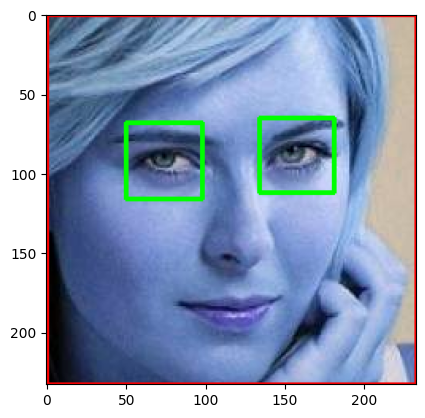

In [26]:
plt.imshow(roi_color, cmap='gray')
# roi_rgb = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)
# plt.imshow(roi_rgb)
# plt.axis('off')
plt.show()

In [28]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

## **(3) Preprocessing: Use wavelet transform as a feature for traning our model**
#### **In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc**

## Wavelet Transform

In [32]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

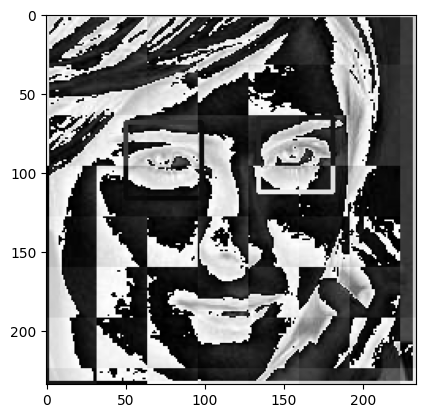

In [34]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

#### **You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier**

## **(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region**
#### **Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)**

In [38]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

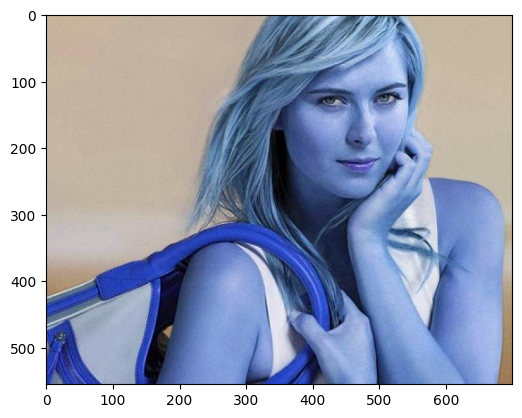

In [40]:
original_image = cv2.imread('./model/test_images/sharapova1.jpg')
plt.imshow(original_image)
plt.show()

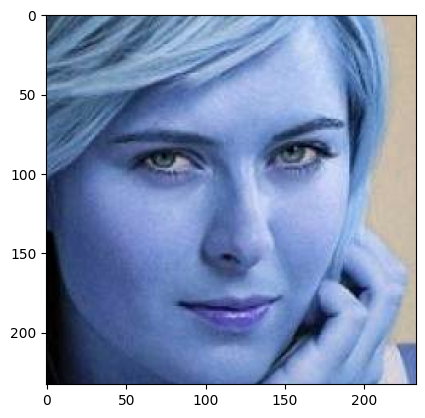

In [42]:
cropped_image = get_cropped_image_if_2_eyes('./model/test_images/sharapova1.jpg')
plt.imshow(cropped_image)
plt.show()

#### **In below image face is not very clear and it doesn't have two eyes clearly visible**

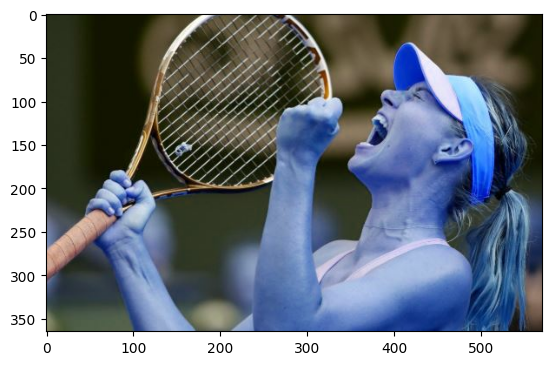

In [45]:
org_image_obstructed = cv2.imread('./model/test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)
plt.show()

In [47]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./model/test_images/sharapova2.jpg')
cropped_image_no_2_eyes

#### __Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training__

In [50]:
path_to_data = './model/dataset'
path_to_cr_data = "./model/dataset/cropped/"

In [52]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [54]:
img_dirs

['./model/dataset/maria_sharapova',
 './model/dataset/virat_kohli',
 './model/dataset/lionel_messi',
 './model/dataset/cropped',
 './model/dataset/serena_williams',
 './model/dataset/roger_federer']

#### **Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [57]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [59]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        # Skip directories and non-image files
        if not entry.is_file() or not entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
            
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print(f"Generating cropped images in folder: {cropped_folder}")
                
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1
                
        except Exception as e:
            print(f"Error processing {entry.path}: {str(e)}")


Generating cropped images in folder: ./model/dataset/cropped/maria_sharapova
Generating cropped images in folder: ./model/dataset/cropped/virat_kohli
Generating cropped images in folder: ./model/dataset/cropped/lionel_messi
Generating cropped images in folder: ./model/dataset/cropped/serena_williams
Generating cropped images in folder: ./model/dataset/cropped/roger_federer


### **Now you should have cropped folder under datasets folder that contains cropped images**
### **Manually examine cropped folder and delete any unwanted images**

In [62]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'maria_sharapova': ['./model/dataset/cropped/maria_sharapova/maria_sharapova2.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova3.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova1.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova4.png',
  './model/dataset/cropped/maria_sharapova/.DS_Store',
  './model/dataset/cropped/maria_sharapova/maria_sharapova5.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova6.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova17.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova16.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova28.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova14.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova15.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova29.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova11.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova10.

In [64]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

#### **Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now**

In [87]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)

        # Skip if image is not loaded
        if img is None:
            print(f"Error loading image: {training_image}")
            continue  

        scalled_raw_img = cv2.resize(img, (32, 32))  # Resize only if img is valid
        img_har = w2d(img, 'db1', 5)  # Wavelet transform function (Ensure it's correctly implemented)

        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))

        X.append(combined_img)
        y.append(class_dict[celebrity_name])


Error loading image: ./model/dataset/cropped/maria_sharapova/.DS_Store
Error loading image: ./model/dataset/cropped/virat_kohli/.DS_Store
Error loading image: ./model/dataset/cropped/lionel_messi/.DS_Store
Error loading image: ./model/dataset/cropped/serena_williams/.DS_Store
Error loading image: ./model/dataset/cropped/roger_federer/.DS_Store


In [89]:
len(X[0])

4096

In [91]:
32*32*3 + 32*32

4096

In [93]:
X[0]

array([[ 43],
       [ 43],
       [ 43],
       ...,
       [253],
       [242],
       [ 19]], shape=(4096, 1), dtype=uint8)

In [95]:
y[0]

0

In [97]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(142, 4096)

## **Data cleaning process is done. Now we are ready to train our model**
#### **We will use SVM with rbf kernel tuned with heuristic finetuning**


In [100]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8611111111111112

In [104]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.89      1.00      0.94         8
           2       0.88      0.88      0.88         8
           3       0.80      0.67      0.73         6
           4       0.75      0.75      0.75         4

    accuracy                           0.86        36
   macro avg       0.84      0.84      0.84        36
weighted avg       0.86      0.86      0.86        36



## **Let's use GridSearch to try out different models with different parameters. Goal is to come up with best modle with best fine tuned parameters**

In [107]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [109]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [111]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Users/prathamkashyap/anaconda3/envs/py13_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/prathamkashyap/anaconda3/envs/py13_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/prathamkashyap/anaconda3/envs/py13_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/prathamkashyap/anaconda3/envs/py1

,model,best_score,best_params
0,svm,0.821212,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.641991,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.830736,{'logisticregression__C': 1}


In [112]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [115]:
best_estimators['svm'].score(X_test,y_test)

0.9166666666666666

In [117]:
best_estimators['random_forest'].score(X_test,y_test)

0.7777777777777778

In [119]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9166666666666666

In [121]:
best_clf = best_estimators['logistic_regression']

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 2,  0,  6,  0,  0],
       [ 1,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  4]])

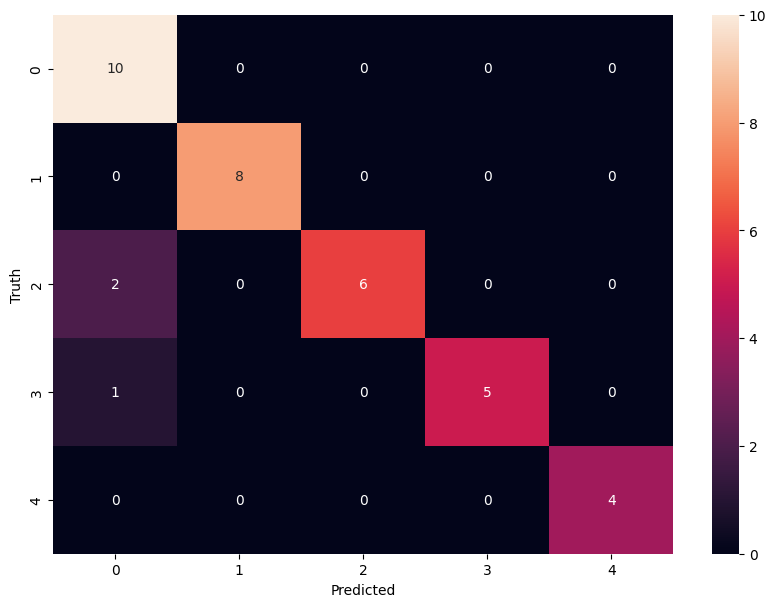

In [125]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [127]:
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

## **Save the trained model**

In [1]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

zsh:1: /opt/homebrew/bin/pip: bad interpreter: /opt/homebrew/opt/python@3.11/bin/python3.11: no such file or directory


NameError: name 'best_clf' is not defined

## **Save class dictionary**

In [60]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
